In [1]:
from server_specific.server_utils import get_patients
import numpy as np
import matplotlib.pyplot as plt
from data_generation.config import mean_voxel_intensity
from data.data_utils import shift_mean, pad_image, calculate_voxel_intensities_of_the_masked_area, calculate_voxel_intensities_of_patches

In [2]:
patients = get_patients()
patients = np.array(patients)

amt of detected_files:  1800
amt of patients:  800


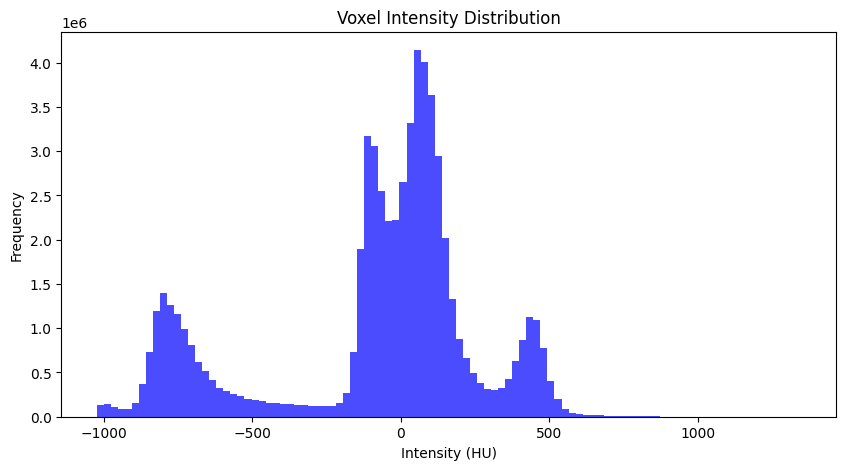

In [3]:
test_ccta_scan, _ = patients[1].get_image_mask_tuple()
flattened_ccta_scan = test_ccta_scan.flatten()

# Plotting the histogram of voxel intensities
plt.figure(figsize=(10, 5))
plt.hist(flattened_ccta_scan, bins=100, color='blue', alpha=0.7)
plt.title("Voxel Intensity Distribution")
plt.xlabel("Intensity (HU)")
plt.ylabel("Frequency")
plt.show()

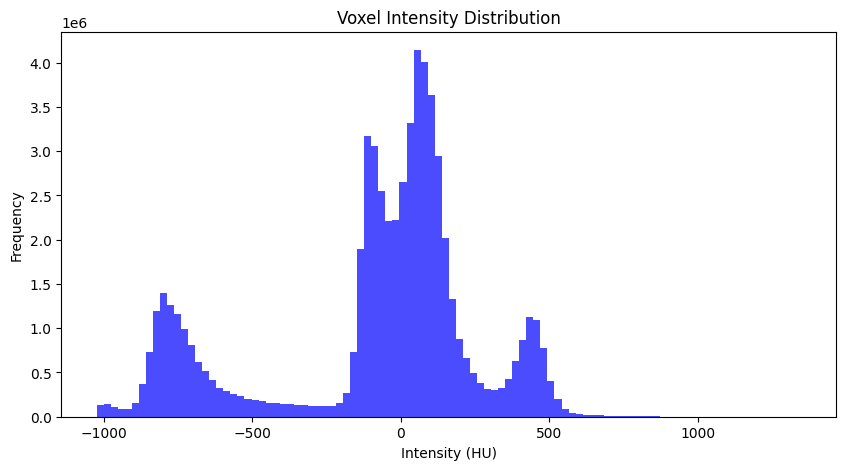

In [4]:
test_ccta_scan, _ = patients[1].get_image_mask_tuple()
flattened_ccta_scan = test_ccta_scan.flatten()

# Plotting the histogram of voxel intensities
plt.figure(figsize=(10, 5))
plt.hist(flattened_ccta_scan, bins=100, color='blue', alpha=0.7)
plt.title("Voxel Intensity Distribution")
plt.xlabel("Intensity (HU)")
plt.ylabel("Frequency")
plt.show()

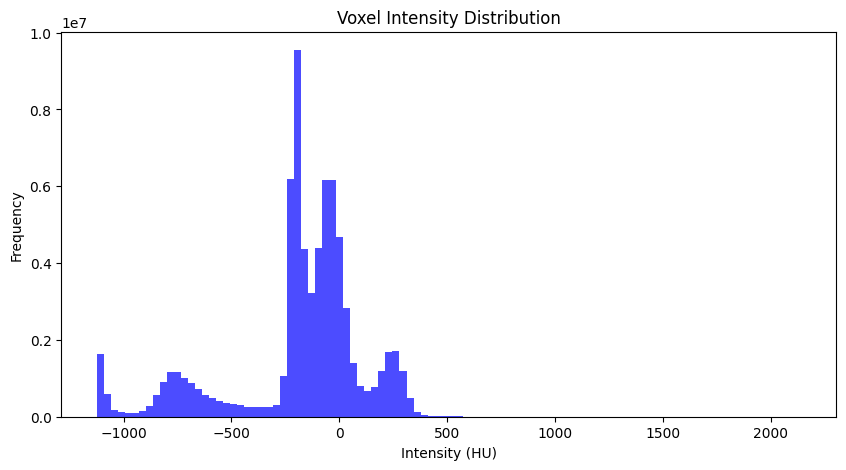

In [8]:
test_ccta_scan, _ = patients[10].get_image_mask_tuple()
flattened_ccta_scan = test_ccta_scan.flatten()

# Plotting the histogram of voxel intensities
plt.figure(figsize=(10, 5))
plt.hist(flattened_ccta_scan, bins=100, color='blue', alpha=0.7)
plt.title("Voxel Intensity Distribution")
plt.xlabel("Intensity (HU)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
test_ccta_scan, _ = patients[10].get_image_mask_tuple()
flattened_ccta_scan = test_ccta_scan.flatten()

# Plotting the histogram of voxel intensities
plt.figure(figsize=(10, 5))
plt.hist(flattened_ccta_scan, bins=100, color='blue', alpha=0.7)
plt.title("Voxel Intensity Distribution")
plt.xlabel("Intensity (HU)")
plt.ylabel("Frequency")
plt.show()

In [9]:
patients = get_patients()
patients = np.array(patients)


total_counts, bin_edges = calculate_voxel_intensities_of_the_masked_area(patients)

amt of detected_files:  1800
amt of patients:  800
processing image 1 / 800
processing image 2 / 800
processing image 3 / 800
processing image 4 / 800
processing image 5 / 800
processing image 6 / 800
processing image 7 / 800
processing image 8 / 800
processing image 9 / 800
processing image 10 / 800
processing image 11 / 800
processing image 12 / 800
processing image 13 / 800
processing image 14 / 800
processing image 15 / 800
processing image 16 / 800
processing image 17 / 800
processing image 18 / 800
processing image 19 / 800
processing image 20 / 800
processing image 21 / 800
processing image 22 / 800
processing image 23 / 800
processing image 24 / 800
processing image 25 / 800
processing image 26 / 800
processing image 27 / 800
processing image 28 / 800
processing image 29 / 800
processing image 30 / 800
processing image 31 / 800
processing image 32 / 800
processing image 33 / 800
processing image 34 / 800
processing image 35 / 800
processing image 36 / 800
processing image 37 / 

In [10]:
def plot_histogram(bin_centers, total_counts, title = "Voxel Intensity Distribution"):
    # Calculate bin centers for plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(bin_centers, total_counts, width=np.diff(bin_edges), edgecolor='black', align='center')
    plt.xlabel("Intensity Values")
    plt.ylabel("Counts")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [ ]:
total_counts_patch_with_coronary_arteries, total_counts_patch_without_coronary_arteries, bin_edges = calculate_voxel_intensities_of_patches(patients)

In [ ]:
plot_histogram(bin_centers = bin_edges, total_counts= total_counts_patch_with_coronary_arteries, title="voxel intensity distribution in masked areas")

In [ ]:
plot_histogram(bin_centers = bin_edges, total_counts= total_counts_patch_without_coronary_arteries, title="voxel intensity distribution in non masked areas")